In [47]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Chargement fichiers avec infos de dépassement d'honoraires (base DAMIR)
# On ne va travailler que sur les données d'1 mois: octobre 2017, car les tables sont trop lourdes à manipuler pour mon PC
R201710 = pd.read_csv("DM_data/R201710_sanslib.CSV", sep=";", decimal=",", low_memory=False)

In [3]:
R201710.head()

,cpam,SERIE,prs_nat,sns_date,asu_nat,cpl_cod,ben_qlt,REM_TAU,pre_spe,pre_spe1,pre_stj1,exe_spe,exe_spe1,exe_stj1,top_slm,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,974,111111,1101,201710,1,0,1,52,1,1,1,1,11,1,0,"28,64","55,08","0,00",1,"1,00"
1,594,111111,1101,201710,1,0,1,56,1,1,1,1,11,1,0,"38,30","68,39","21,00",1,"1,00"
2,331,111111,1101,201710,1,0,1,70,1,1,1,1,11,1,0,"48,30","69,00","0,00",1,"1,00"
3,331,111111,1101,201710,1,0,1,70,1,1,1,1,11,1,1,"48,30","69,00","0,00",1,"1,00"
4,451,111111,1101,201710,1,0,1,70,1,1,1,1,11,1,0,"96,60","138,00","162,00",2,"2,00"


In [4]:
# On ne conserve que les colonnes intéressantes
R201710 = R201710[['cpam', 'exe_spe' ,'dep_mon' ]]

In [5]:
R201710.dtypes

cpam        int64
exe_spe     int64
dep_mon    object
dtype: object

In [6]:
# Transformation de la colonne dep_mon en float
R201710.dep_mon = pd.to_numeric(R201710.dep_mon.str.replace(",", "."), errors="coerce")

In [7]:
R201710.head()

,cpam,exe_spe,dep_mon
0,974,1,0.0
1,594,1,21.0
2,331,1,0.0
3,331,1,0.0
4,451,1,162.0


In [8]:
# Chargement des tables de correspondance pour décoder les valeurs de R201710
cpam_df = pd.read_csv("DM_data/Lexique tables R/cpam.csv", sep=";", encoding = "ISO-8859-1")
exeSpe_df = pd.read_csv("DM_data/Lexique tables R/lib_r_exe_spe.csv", sep=";", encoding = "ISO-8859-1")

In [9]:
cpam_df.set_index('cpam', inplace=True)
cpam_df.head()

,l_cpam,dpt,l_dpt,region,l_region
cpam,,,,,
11,011-Bourg-en-Bresse,1,01-Ain,82,82-RHONE ALPES
21,021-Laon,2,02-Aisne,22,22-PICARDIE
31,031-Moulins,3,03-Allier,83,83-AUVERGNE
41,041-Digne,4,04-Alpes-haute-Provence,93,93-PROVENCE ALPES COTE D'AZUR
51,051-Gap,5,05-Hautes-Alpes,93,93-PROVENCE ALPES COTE D'AZUR


In [10]:
exeSpe_df.set_index('exe_spe', inplace=True)
exeSpe_df

,l_exe_spe
exe_spe,
1,01-TOTAL Omnipraticiens
2,02-total Anesthésiologie - Réanimation chirurg...
3,03-Pathologie cardio-vasculaire
4,04-TOTAL Chirurgie
5,05-Dermatologie et vénérologie
6,06-TOTAL Radiologie
7,07-TOTAL Gynécologie
8,08-Gastro-entérologie et hépatologie
9,09-TOTAL Médecine interne


In [11]:
exeSpe_df

,l_exe_spe
exe_spe,
1,01-TOTAL Omnipraticiens
2,02-total Anesthésiologie - Réanimation chirurg...
3,03-Pathologie cardio-vasculaire
4,04-TOTAL Chirurgie
5,05-Dermatologie et vénérologie
6,06-TOTAL Radiologie
7,07-TOTAL Gynécologie
8,08-Gastro-entérologie et hépatologie
9,09-TOTAL Médecine interne


In [12]:
# Merge des tables ratioDep_df, 
R201710 = R201710.merge(cpam_df, how='left', left_on='cpam', right_on='cpam')
R201710.head()

,cpam,exe_spe,dep_mon,l_cpam,dpt,l_dpt,region,l_region
0,974,1,0.0,974-Saint-Denis,974,974-Réunion,4,04-REUNION
1,594,1,21.0,594-Dunkerque,59,5-Nord,31,31-NORD PAS DE CALAIS
2,331,1,0.0,331-Bordeaux,33,33-Gironde,72,72-AQUITAINE
3,331,1,0.0,331-Bordeaux,33,33-Gironde,72,72-AQUITAINE
4,451,1,162.0,451-Orléans,45,45-Loiret,24,24-CENTRE


In [13]:
# Remplacement de dep_mon par un booléen
R201710['depassement'] = R201710.dep_mon > 0
R201710.drop(columns='dep_mon', inplace=True)
R201710.head()

,cpam,exe_spe,l_cpam,dpt,l_dpt,region,l_region,depassement
0,974,1,974-Saint-Denis,974,974-Réunion,4,04-REUNION,False
1,594,1,594-Dunkerque,59,5-Nord,31,31-NORD PAS DE CALAIS,True
2,331,1,331-Bordeaux,33,33-Gironde,72,72-AQUITAINE,False
3,331,1,331-Bordeaux,33,33-Gironde,72,72-AQUITAINE,False
4,451,1,451-Orléans,45,45-Loiret,24,24-CENTRE,True


In [14]:
# On va travailler avec une granularité par département: on ne garde que les colonnes nécessaires
R201710.drop(columns=['cpam', 'l_cpam', 'region', 'l_region'], inplace=True)
R201710.head()

,exe_spe,dpt,l_dpt,depassement
0,1,974,974-Réunion,False
1,1,59,5-Nord,True
2,1,33,33-Gironde,False
3,1,33,33-Gironde,False
4,1,45,45-Loiret,True


In [15]:
# Calcul des ratios de dépassement d'honoraires par département et spécialité
def ratio(grp):
    return sum(grp)/len(grp)

ratioDep_df = R201710.groupby(['dpt', 'exe_spe']).agg(ratio)
ratioDep_df.head()

depassement
dpt exe_spe             
1   1           0.177982
    2           0.267782
    3           0.236407
    4           0.331978
    5           0.383459

In [16]:
# Suppression des exe_spe qui ne correspondent pas a une spécialité de médecin
exeSpe_inutiles = list(exeSpe_df.loc[50:].index)
ratioDep_df.drop(level=1, labels=exeSpe_inutiles, inplace=True)

In [17]:
# Chargement du fichier de densité des médecins (année 2017)
dmed_df = pd.read_csv("DM_data/rpps-medecins18-tab7v3_81185282716522.csv", sep=";", encoding = "ISO-8859-1", skiprows=4)

In [18]:
dmed_df

,SPECIALITE,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
0,ZONE INSCRIPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FRANCE ENTIERE,337.0,183.8,2.4,17.1,4.5,10.6,5.3,1.7,5.0,...,4.6,22.9,13.3,1.3,0.6,0.0,3.9,2.6,153.2,153.2
2,FRANCE Métropolitaine,339.2,185.5,2.5,17.2,4.5,10.7,5.4,1.8,5.1,...,4.6,23.3,13.4,1.3,0.6,0.0,4.0,2.6,153.7,153.7
3,DROM,270.1,130.7,1.3,14.4,3.4,7.1,3.5,0.8,3.3,...,2.6,12.8,8.5,0.9,0.6,0.0,1.5,2.9,139.4,139.4
4,Auvergne-Rhône-Alpes,336.8,180.8,2.5,18.2,3.9,9.6,5.3,1.7,5.5,...,4.5,22.8,13.1,1.3,0.4,0.0,4.3,2.6,156.0,156.0
5,Bourgogne-Franche-Comté,297.4,152.0,1.8,14.4,3.9,8.1,4.5,1.3,5.1,...,4.3,18.0,10.6,1.1,0.6,0.0,2.9,2.7,145.3,145.3
6,Bretagne,318.6,160.2,2.0,15.6,3.9,9.1,3.8,0.6,4.8,...,4.7,18.7,11.0,1.3,0.4,0.0,3.8,2.2,158.4,158.4
7,Centre-Val de Loire,264.6,140.2,1.8,11.8,3.8,8.8,4.1,1.2,4.1,...,3.4,15.6,11.2,1.4,0.5,0.0,3.5,1.5,124.4,124.4
8,Corse,303.6,147.7,1.2,13.9,3.6,10.9,3.6,1.8,4.8,...,3.9,18.2,11.8,0.9,0.3,0.0,2.1,1.2,155.9,155.9
9,Grand Est,320.3,169.9,2.1,16.7,4.0,10.5,5.8,0.8,4.9,...,4.3,17.7,12.8,1.4,0.8,0.0,3.4,2.5,150.4,150.4


In [19]:
# On travaille par département: on supprime les lignes inutiles
dmed_df.drop(index=list(range(0,17)), inplace=True)

In [21]:
# On extrait les numéros de département
dmed_df['dpt'] = dmed_df.SPECIALITE.str.split(" - ", expand = True)[0]
dmed_df['dpt'] = pd.to_numeric(dmed_df['dpt'], errors='coerce')
dmed_df.rename(columns={"SPECIALITE": "département"}, inplace=True)
dmed_df.head()

,département,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,...,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale,dpt
17,01 - Ain,189.6,81.0,0.5,6.1,1.2,4.2,1.4,0.6,2.7,...,10.1,7.5,0.5,0.5,0.0,1.9,0.8,108.5,108.5,01
18,02 - Aisne,230.5,116.6,0.7,6.5,1.9,7.1,3.3,0.7,4.6,...,13.0,9.1,0.9,0.7,0.0,2.8,0.7,114.0,114.0,02
19,03 - Allier,279.3,137.9,0.6,11.7,2.0,9.3,3.5,0.9,7.0,...,14.9,11.1,1.7,0.9,0.0,4.4,0.9,141.4,141.4,03
20,04 - Alpes-de-Haute-Provence,302.6,120.7,1.9,9.3,3.1,8.0,1.9,0.6,6.2,...,16.1,8.7,0.0,0.0,0.0,2.5,0.6,181.9,181.9,04
21,05 - Hautes-Alpes,434.3,189.4,2.1,24.9,5.0,10.0,5.0,0.7,10.7,...,13.5,14.2,1.4,0.0,0.0,2.8,4.3,244.9,244.9,05


In [31]:
# Chaque élément de ce datframe devra avoir un équivalent dans dmed_df pour faire les correspondances:
exeSpe_df.loc[:42]

,l_exe_spe
exe_spe,
1,01-TOTAL Omnipraticiens
2,02-total Anesthésiologie - Réanimation chirurg...
3,03-Pathologie cardio-vasculaire
4,04-TOTAL Chirurgie
5,05-Dermatologie et vénérologie
6,06-TOTAL Radiologie
7,07-TOTAL Gynécologie
8,08-Gastro-entérologie et hépatologie
9,09-TOTAL Médecine interne


In [32]:
dmed_specList = list(dmed_df.columns)
dmed_specList

['département',
 "Ensemble des spécialités d'exercice",
 'Spécialistes',
 'Anatomie et cytologie pathologiques',
 'Anesthésie-réanimation',
 'Biologie médicale',
 'Cardiologie et maladies vasculaires',
 'Chirurgie générale',
 'Chirurgie maxillo-faciale et stomatologie',
 'Chirurgie orthopédique et traumatologie',
 'Chirurgie infantile',
 'Chirurgie plastique reconstructrice et esthétique',
 'Chirurgie thoracique et cardio-vasculaire',
 'Chirurgie urologique',
 'Chirurgie vasculaire',
 'Chirurgie viscérale et digestive',
 'Dermatologie et vénéréologie',
 'Endocrinologie et métabolisme',
 'Génétique médicale',
 'Gériatrie',
 'Gynécologie médicale',
 'Gynécologie-obstétrique',
 'Hématologie',
 'Gastro-entérologie et hépatologie',
 'Médecine du travail',
 'Médecine interne',
 'Médecine nucléaire',
 'Médecine physique et réadaptation',
 'Néphrologie',
 'Neurochirurgie',
 'Neurologie',
 'ORL et chirurgie cervico-faciale',
 'Oncologie option médicale',
 'Ophtalmologie',
 'Pédiatrie',
 'Pneumo

In [33]:
# On va créer un dictionnaire à la main pour les correspondances entre exe_spe et dmed_df, les dénominations ne correspondent pas exactement :
specMed_dict = {
    # 1 : pas d'équivalent dans dmed_df
    2 : 'Anesthésie-réanimation',
    3 : 'Cardiologie et maladies vasculaires',
    4 : 'Chirurgie générale',
    5 : 'Dermatologie et vénéréologie',
    6 : 'Radiodiagnostic et imagerie médicale',
    7 : 'Gynécologie médicale',
    8 : 'Gastro-entérologie et hépatologie',
    9 : 'Médecine interne',
    # 11 : pas d'équivalent dans dmed_df
    12 : 'Pédiatrie',
    13 : 'Pneumologie',
    14 : 'Rhumatologie',
    15 : 'Ophtalmologie',
    17 : 'Psychiatrie',
    18 : 'Chirurgie maxillo-faciale et stomatologie',
    19 : 'Chirurgie maxillo-faciale et stomatologie',
    # 21 : pas d'équivalent dans dmed_df
    # 24 : pas d'équivalent dans dmed_df
    # 26 : pas d'équivalent dans dmed_df
    # 27 : pas d'équivalent dans dmed_df
    # 28 : pas d'équivalent dans dmed_df
    # 29 : pas d'équivalent dans dmed_df
    # 30 : pas d'équivalent dans dmed_df
    31 : 'Anesthésie-réanimation',
    32 : 'Neurologie',
    34 : 'Gériatrie',
    35 : 'Néphrologie',
    # 36 : pas d'équivalent dans dmed_df
    37 : 'Anatomie et cytologie pathologiques',
    # 38 : pas d'équivalent dans dmed_df
    42 : 'Endocrinologie et métabolisme'  
}

In [34]:
# Réindexation ratioDep_df
ratioDep_df.reset_index(inplace=True)
ratioDep_df['dpt'] = pd.to_numeric(ratioDep_df['dpt'], errors='coerce')

In [35]:
# Import des dénominations correspondantes à dmd_df dans ratioDep_df grâce au dictionnaire
ratioDep_df['spec_med'] = ratioDep_df['exe_spe'].map(specMed_dict)
ratioDep_df.head()

,dpt,exe_spe,depassement,spec_med
0,1,1,0.177982,NaN
1,1,2,0.267782,Anesthésie-réanimation
2,1,3,0.236407,Cardiologie et maladies vasculaires
3,1,4,0.331978,Chirurgie générale
4,1,5,0.383459,Dermatologie et vénéréologie


In [36]:
melted_dmed_df = dmed_df.melt(id_vars=["département", "dpt"])
melted_dmed_df.rename(columns={"variable": "spec_med", "value": "densité"}, inplace=True)
melted_dmed_df.head()

,département,dpt,spec_med,densité
0,01 - Ain,1.0,Ensemble des spécialités d'exercice,189.6
1,02 - Aisne,2.0,Ensemble des spécialités d'exercice,230.5
2,03 - Allier,3.0,Ensemble des spécialités d'exercice,279.3
3,04 - Alpes-de-Haute-Provence,4.0,Ensemble des spécialités d'exercice,302.6
4,05 - Hautes-Alpes,5.0,Ensemble des spécialités d'exercice,434.3


In [44]:
# On peut enfin merger ratioDep_df et melted_dmed_df: 
# on aura pour chaque région et chaque spécialité le taux de dépassement d'honoraires
final_table = ratioDep_df.merge(melted_dmed_df, how='left', on=['dpt', 'spec_med'])
final_table.head()

,dpt,exe_spe,depassement,spec_med,département,densité
0,1.0,1,0.177982,NaN,NaN,NaN
1,1.0,2,0.267782,Anesthésie-réanimation,01 - Ain,6.1
2,1.0,3,0.236407,Cardiologie et maladies vasculaires,01 - Ain,4.2
3,1.0,4,0.331978,Chirurgie générale,01 - Ain,1.4
4,1.0,5,0.383459,Dermatologie et vénéréologie,01 - Ain,2.0


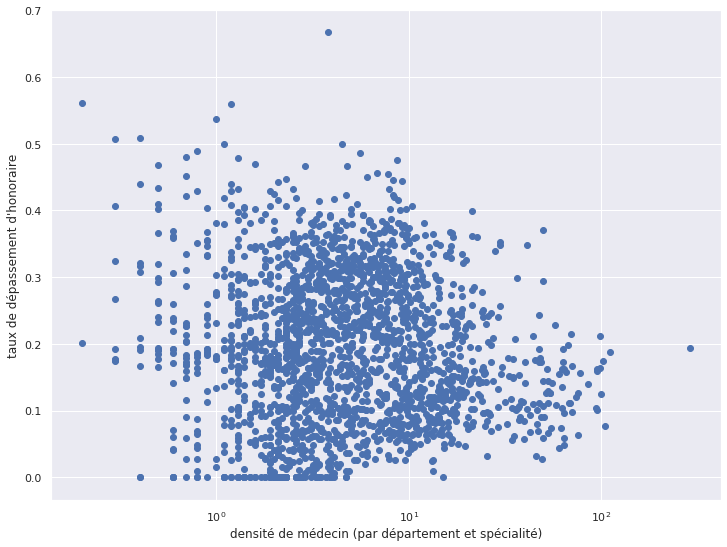

In [73]:
# On trace le ratio de dépassement d'honoraire en fonction de la densité de médecin 
# (qui est déjà fractionnée par département et spécialité médicale)
sns.set("notebook")
fig, ax = plt.subplots(figsize=(12, 9))
plt.xlabel("densité de médecin (par département et spécialité)")
plt.ylabel("taux de dépassement d'honoraire")
ax.plot(final_table.densité, final_table.depassement, marker='o', linestyle='None') # Marche pas bien avec scatter
ax.set_xscale('log') # On trace les densité en échelle log
